### HomeWork 2- 
<h1 align="center"> 17350796</h1>

In [110]:
import pandas as pd

from pandas.plotting import table
# import dataframe_image as dfi

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages


from scipy import stats




# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from numpy import sqrt

from sklearn.ensemble import RandomForestRegressor



import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 16,8



import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from yellowbrick.model_selection import learning_curve



from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV




<h2 align="center"> Introduction</h2>

In this notebook, machine learning models are created, trained and evaluated in the aim of predicting house prices in Ireland. This is a very interesting and pertinent task considering the housing crisis in Ireland. 

Firstly, the data frame from the previous data preparation task is loaded. This data is again cleaned to ensure it is as robust as possible. This data is then split 70% training and 30% test. As our target feature is continous data, this is a regression task. A number graphs and plots are computed to see what features interact with the price data. The training features are then finalized. Using these training features a multiple linear regression model, a decision tree, and a random forest model are generated. Interpretation, evaluation and cross validation is performed on each model. The best model is chosen and improvements for this model are attempted. This is then evaluated on new test data.   

In [2]:

df = pd.read_csv('final-file-additonal-features-17350796.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)



In [3]:
df.head()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
0,2016-06-05 00:00:00,"21 curzon st, portobello, d8",d8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2016.0,0.032830,Summer,Leinster,298.73,35037.0,d8
1,2014-12-22 00:00:00,"44 rothe abbey, kilmainham, d8",d8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2014.0,0.032830,Winter,Leinster,258.63,31897.0,d8
2,2020-05-22 00:00:00,"17 merrion park, blackrock, dublin",NaN,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2020.0,0.032830,Spring,Leinster,425.89,Unkown,NaN
3,2014-11-27 00:00:00,"knockroe, rathmoyle, co.kilkenny",NaN,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2014.0,0.806452,Autumn,Leinster,258.63,31897.0,NaN
4,2018-11-22 00:00:00,"15 shannon park, lifford rd, ennis",NaN,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2018.0,0.432900,Autumn,Munster,384.85,Unkown,NaN


In [4]:
df.tail()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
9542,2012-12-18 00:00:00,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2012.0,0.032830,Winter,Leinster,225.51,17769.0,NaN
9543,2016-12-14 00:00:00,"the log cabin, forge cottage, cullenstown",NaN,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2016.0,0.286533,Winter,Leinster,298.73,35037.0,NaN
9544,2017-06-19 00:00:00,"carrig rd, parkmore, roscrea",NaN,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2017.0,0.371747,Summer,Munster,334.6,Unkown,NaN
9545,2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.000000,Winter,NaN,NaN,NaN,NaN
9546,2022-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.000000,Winter,NaN,NaN,NaN,NaN


In [5]:
df = df[df.Address.notnull()]

df.tail()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
9540,2016-12-22 00:00:00,"8 oakpark, newcastle west, limerick",NaN,Limerick,118000.00,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2016.0,0.294118,Winter,Munster,298.73,35037.0,NaN
9541,2017-12-15 00:00:00,"knockasartnett, killarney, kerry",NaN,Kerry,200000.00,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2017.0,0.370370,Winter,Munster,334.6,Unkown,NaN
9542,2012-12-18 00:00:00,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2012.0,0.032830,Winter,Leinster,225.51,17769.0,NaN
9543,2016-12-14 00:00:00,"the log cabin, forge cottage, cullenstown",NaN,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2016.0,0.286533,Winter,Leinster,298.73,35037.0,NaN
9544,2017-06-19 00:00:00,"carrig rd, parkmore, roscrea",NaN,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2017.0,0.371747,Summer,Munster,334.6,Unkown,NaN


In [6]:
# Converting NaN values to None

df = df.fillna('none')


#### Deleting redundant column:

In [7]:

# deleting percent column
del df["percent"]

#### Checking for NaN values

In [8]:

((df['Price (€)'] == 'None')).any()


False

In [9]:
df.isnull().values.any()


False

#### Removing extreme Prices:

In [10]:

numeric_columns = df.select_dtypes(['float64','int']).columns

df[numeric_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
Price (€),9545.0,259411.117276,284346.547436,5500.0,123000.0,206090.0,314977.97,7600000.0
Month,9545.0,6.869565,3.480466,1.0,4.0,7.0,10.00,12.0
Year,9545.0,2016.524358,3.101567,2010.0,2014.0,2017.0,2019.00,2022.0


In [11]:
q = df["Price (€)"].quantile(0.99)
df[df["Price (€)"] < q]
q_low = df["Price (€)"].quantile(0.01)
q_hi  = df["Price (€)"].quantile(0.99)

df = df[(df["Price (€)"] < q_hi) & (df["Price (€)"] > q_low)]

df[numeric_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
Price (€),9353.0,242615.317045,172325.996980,22000.0,125000.0,206090.0,310000.0,1255000.0
Month,9353.0,6.866353,3.478471,1.0,4.0,7.0,10.0,12.0
Year,9353.0,2016.519833,3.102721,2010.0,2014.0,2017.0,2019.0,2022.0


In [12]:
df.head()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
0,2016-06-05 00:00:00,"21 curzon st, portobello, d8",d8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2016.0,Summer,Leinster,298.73,35037.0,d8
1,2014-12-22 00:00:00,"44 rothe abbey, kilmainham, d8",d8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2014.0,Winter,Leinster,258.63,31897.0,d8
2,2020-05-22 00:00:00,"17 merrion park, blackrock, dublin",none,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2020.0,Spring,Leinster,425.89,Unkown,none
3,2014-11-27 00:00:00,"knockroe, rathmoyle, co.kilkenny",none,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2014.0,Autumn,Leinster,258.63,31897.0,none
4,2018-11-22 00:00:00,"15 shannon park, lifford rd, ennis",none,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2018.0,Autumn,Munster,384.85,Unkown,none


In [13]:
df['County'] = df['County'].astype('category')

# There are a set number of unique descriptions

df['Description of Property'] = df['Description of Property'].astype('category')

df['Address'] = df['Address'].astype('category')


# Postal code has a set number of unique categories
df['Postal Code'] = df['Postal Code'].astype('category')

# There are a set number of property size descriptions
df['Property Size Description'] = df['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')

df['Date of Sale (yyyy/mm/dd)'] = pd.to_datetime(df['Date of Sale (yyyy/mm/dd)'])

df['Month'] = df['Month'].astype('category')

df['Year'] = df['Year'].astype('category')


df['Province'] = df['Province'].astype('category')

df['GDP (USD-Billion)'] = df['GDP (USD-Billion)'].astype('category')



df['Total Number of Loans Approved'] = df['Total Number of Loans Approved'].astype('category')

df['Season'] = df['Season'].astype('category')

df['Added Post Codes'] = df['Added Post Codes'].astype('category')


df.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Address                                 category
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                   category
Year                                    category
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

In [14]:
df.isnull().values.any()


False

## (1) Data understanding and perparation

#####  Exploring relationships between feature pairs and selecting/transforming promising features based on a given training set.

#### (1.1) Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [15]:

y =df[['Price (€)']]


X = df.drop(['Price (€)'], 1)


train, test = train_test_split(df, test_size=0.3, random_state=1)

training, testing = train_test_split(df, test_size=0.3, random_state=1)

In [16]:
y.head()

,Price (€)
0,630000.0
1,281000.0
2,560000.0
3,46000.0
4,204000.0


In [17]:
X.head()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
0,2016-06-05,"21 curzon st, portobello, d8",d8,Dublin,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2016.0,Summer,Leinster,298.73,35037.0,d8
1,2014-12-22,"44 rothe abbey, kilmainham, d8",d8,Dublin,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2014.0,Winter,Leinster,258.63,31897.0,d8
2,2020-05-22,"17 merrion park, blackrock, dublin",none,Dublin,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2020.0,Spring,Leinster,425.89,Unkown,none
3,2014-11-27,"knockroe, rathmoyle, co.kilkenny",none,Kilkenny,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2014.0,Autumn,Leinster,258.63,31897.0,none
4,2018-11-22,"15 shannon park, lifford rd, ennis",none,Clare,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2018.0,Autumn,Munster,384.85,Unkown,none


In [18]:
train.shape

(6547, 16)

In [19]:
train

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
551,2021-04-01,"lisieux house, turbotstown, coole",none,Westmeath,260000.00,No,No,Second-Hand Dwelling house /Apartment,None,4.0,2021.0,Spring,Leinster,440.0,Unkown,none
4758,2015-05-22,"25 woodview court, glenalbyn rd, stillorgan",none,Dublin,285000.00,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2015.0,Spring,Leinster,291.46,32236.0,none
4358,2016-02-24,"10 lar easa court, strandhill, sligo",none,Sligo,101000.00,No,No,Second-Hand Dwelling house /Apartment,None,2.0,2016.0,Winter,Connaught,298.73,35037.0,none
1643,2019-06-18,"47 sandyhill gardens, ballymun, d11",d11,Dublin,200000.00,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2019.0,Summer,Leinster,399.12,Unkown,d11
3511,2013-11-25,"19 ard na mul lis na dara, carrick road, dundalk",none,Louth,167000.00,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2013.0,Autumn,Leinster,238.21,19258.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,2017-07-19,"apt 42 new bancroft centre, main street, tallaght",d24,Dublin,183593.98,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,7.0,2017.0,Summer,Leinster,334.6,Unkown,d24
7975,2019-07-10,"27 ilex house, mespil house flats estate, suss...",d4,Dublin,350000.00,No,No,Second-Hand Dwelling house /Apartment,None,7.0,2019.0,Summer,Leinster,399.12,Unkown,d4
925,2013-04-01,"63 mount eagle view, leopardstown heights",d18,Dublin,408350.00,No,No,Second-Hand Dwelling house /Apartment,None,4.0,2013.0,Spring,Leinster,238.21,19258.0,d18
5312,2020-10-29,"4 willow park, westminster park, foxrock d18",d18,Dublin,520000.00,No,No,Second-Hand Dwelling house /Apartment,None,10.0,2020.0,Autumn,Leinster,425.89,Unkown,d18


- The only continuous data type in my data set is the price data. Therefore, I will only be plotting pairwise interactions between the target feature of price and my categorical features

In [20]:
train['County'] = train['County'].astype('category')

# There are a set number of unique descriptions

train['Description of Property'] = train['Description of Property'].astype('category')

train['Address'] = train['Address'].astype('category')


# Postal code has a set number of unique categories
train['Postal Code'] = train['Postal Code'].astype('category')

# There are a set number of property size descriptions
train['Property Size Description'] = train['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
train['VAT Exclusive'] = train['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
train['Not Full Market Price'] = train['Not Full Market Price'].astype('category')

train['Date of Sale (yyyy/mm/dd)'] = pd.to_datetime(train['Date of Sale (yyyy/mm/dd)'])

train['Month'] = train['Month'].astype('category')

train['Year'] = train['Year'].astype('category')


train['Province'] = train['Province'].astype('category')

train['GDP (USD-Billion)'] = train['GDP (USD-Billion)'].astype('category')



train['Total Number of Loans Approved'] = train['Total Number of Loans Approved'].astype('category')

train['Season'] = train['Season'].astype('category')

train['Added Post Codes'] = train['Added Post Codes'].astype('category')









train.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Address                                 category
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                   category
Year                                    category
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

In [21]:
train.head(3)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
551,2021-04-01,"lisieux house, turbotstown, coole",none,Westmeath,260000.0,No,No,Second-Hand Dwelling house /Apartment,None,4.0,2021.0,Spring,Leinster,440.0,Unkown,none
4758,2015-05-22,"25 woodview court, glenalbyn rd, stillorgan",none,Dublin,285000.0,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2015.0,Spring,Leinster,291.46,32236.0,none
4358,2016-02-24,"10 lar easa court, strandhill, sligo",none,Sligo,101000.0,No,No,Second-Hand Dwelling house /Apartment,None,2.0,2016.0,Winter,Connaught,298.73,35037.0,none


In [22]:
category_columns = train.select_dtypes(['category']).columns
target_feature = train.select_dtypes(['float64']).columns



In [23]:
train.tail(1)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
237,2019-05-31,"85 gleann alainn, tullyallen, drogheda",none,Louth,323000.0,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2019.0,Spring,Leinster,399.12,Unkown,none


### (1.2) On the training set:
####    - Plot the correlations between all the continuous features (if any). Discuss what you observe in these plots.
####    - For each categorical feature, plot its pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices

- Violin plots were the main way of evaluating the interaction between categorical features and the target feature. 
- The reason it was chosen is that A violin plot is more informative than normal box plot. The violin plot shows the full distribution of the data not only mean, median and interquartile ranges. It can also show if there are different peaks in the data and the amplitude. This is important for this data as it is expected to find multimodal features. 

- ref https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

### County

<AxesSubplot:xlabel='County', ylabel='Price (€)'>

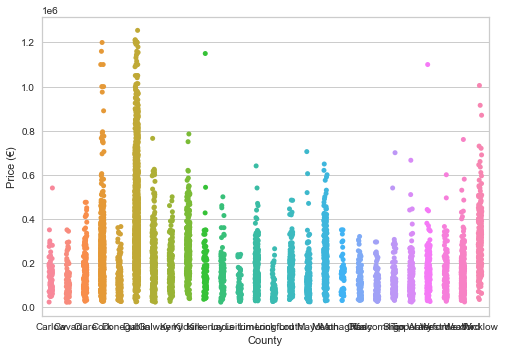

In [24]:
sns.stripplot(x="County", y="Price (€)", data=train) 


<AxesSubplot:xlabel='County', ylabel='Price (€)'>

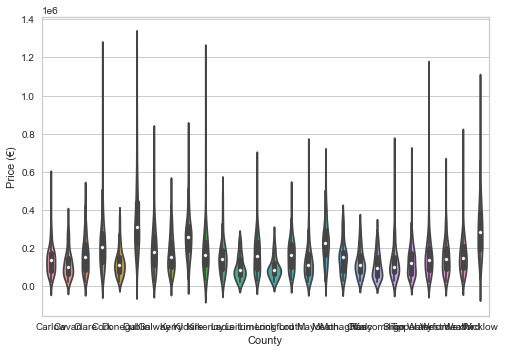

In [25]:
sns.violinplot(x="County", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

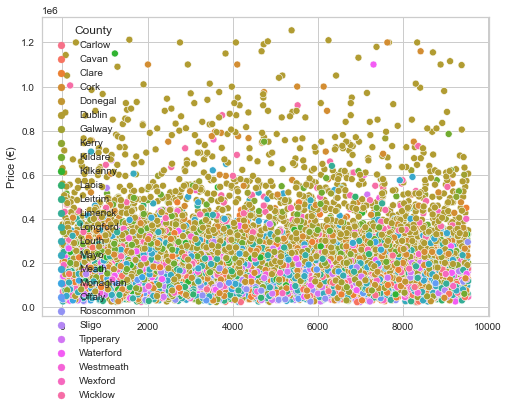

In [26]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='County')


### Description of Property 

<AxesSubplot:xlabel='Description of Property', ylabel='Price (€)'>

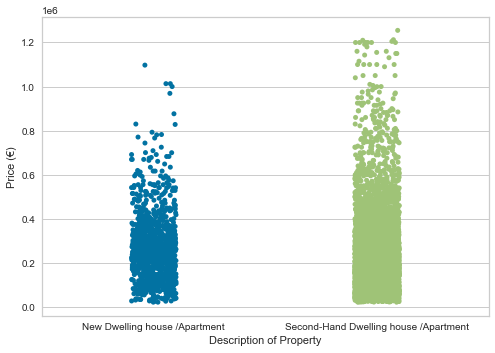

In [27]:
sns.stripplot(x="Description of Property", y="Price (€)", data=train) 


<AxesSubplot:xlabel='Description of Property', ylabel='Price (€)'>

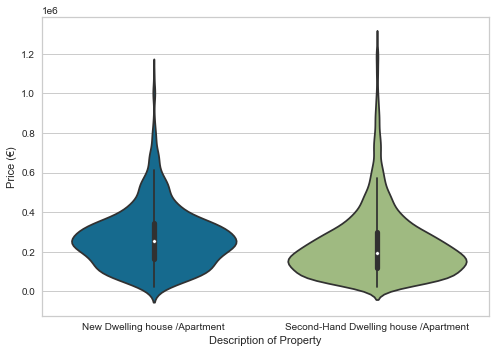

In [28]:
sns.violinplot(x="Description of Property", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

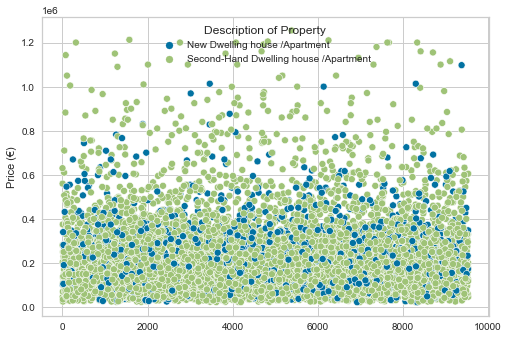

In [29]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Description of Property')


### Property Size Description

<AxesSubplot:xlabel='Property Size Description', ylabel='Price (€)'>

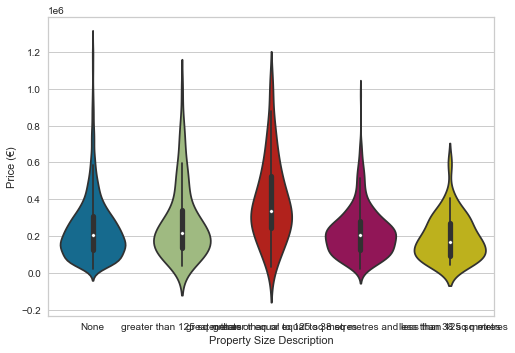

In [30]:
sns.violinplot(x="Property Size Description", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

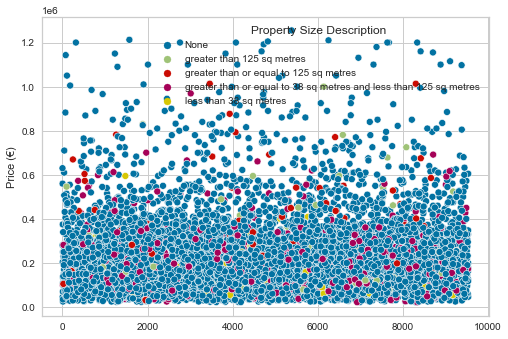

In [31]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Property Size Description')


### Month

<AxesSubplot:xlabel='Month', ylabel='Price (€)'>

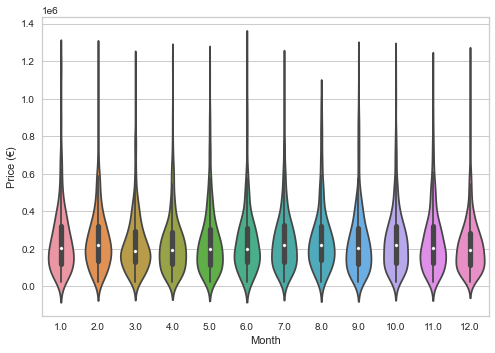

In [32]:
sns.violinplot(x="Month", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

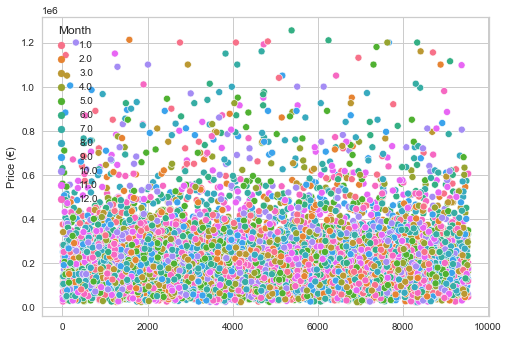

In [33]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Month')


### Year

<AxesSubplot:xlabel='Year', ylabel='Price (€)'>

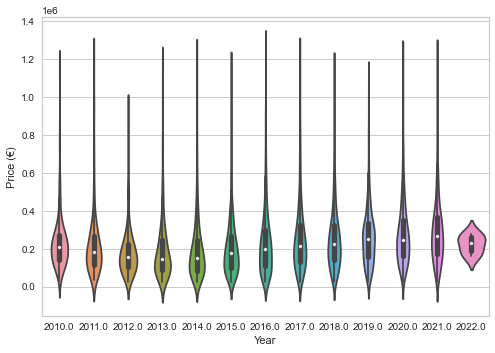

In [34]:
sns.violinplot(x="Year", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

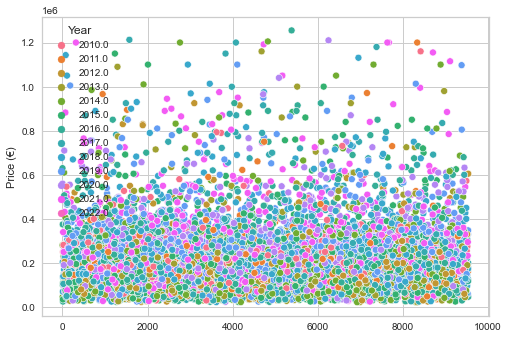

In [35]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Year')


### Province

<AxesSubplot:xlabel='Province', ylabel='Price (€)'>

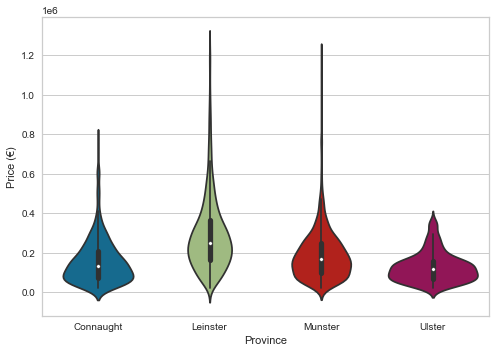

In [36]:
sns.violinplot(x="Province", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

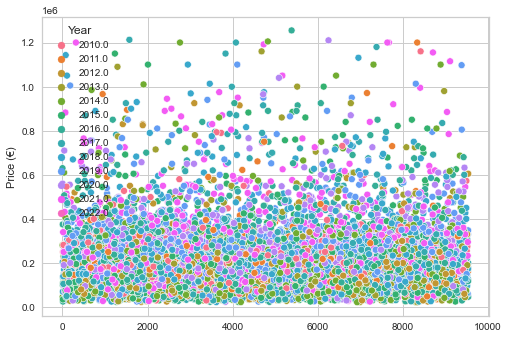

In [37]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Year')


### Season

<AxesSubplot:xlabel='Season', ylabel='Price (€)'>

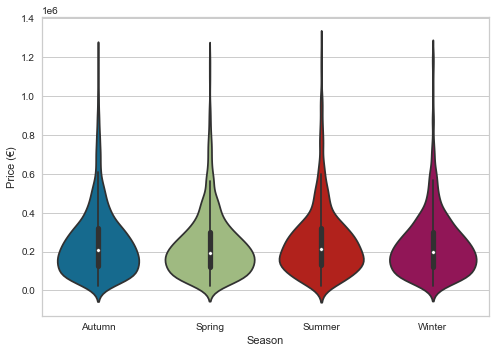

In [38]:
sns.violinplot(x="Season", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

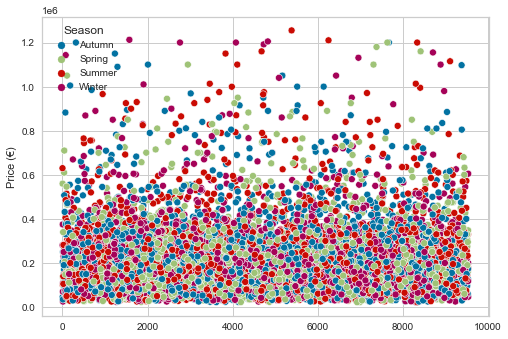

In [39]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Season')


### GDP

<AxesSubplot:xlabel='GDP (USD-Billion)', ylabel='Price (€)'>

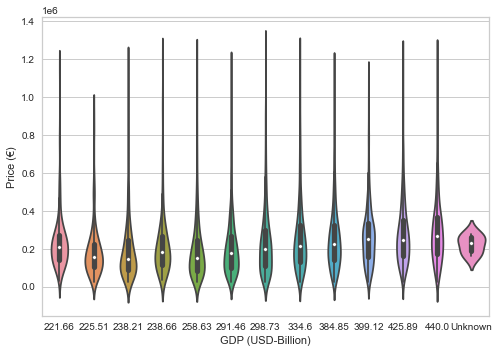

In [40]:



sns.violinplot(x="GDP (USD-Billion)", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

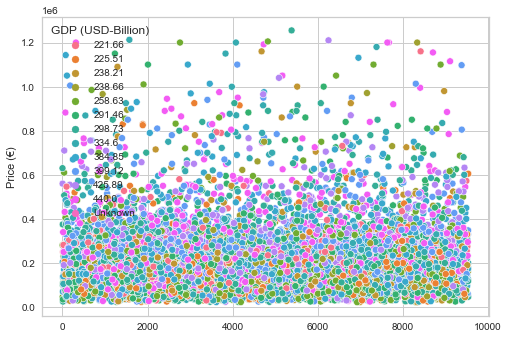

In [41]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='GDP (USD-Billion)')


### Total Number of Loan Approved

<AxesSubplot:xlabel='Total Number of Loans Approved', ylabel='Price (€)'>

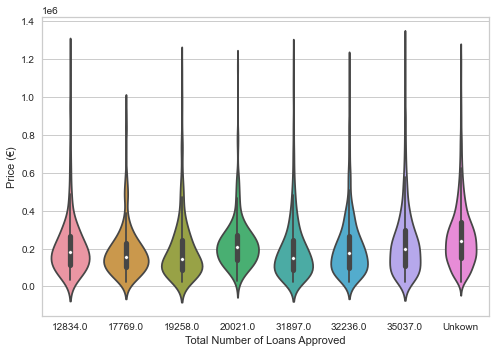

In [42]:
sns.violinplot(x="Total Number of Loans Approved", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

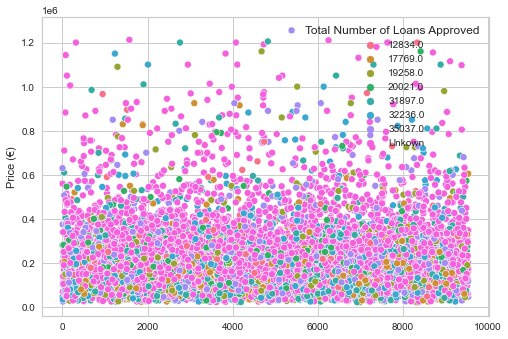

In [43]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Total Number of Loans Approved')



### Added Post Codes

<AxesSubplot:xlabel='Added Post Codes', ylabel='Price (€)'>

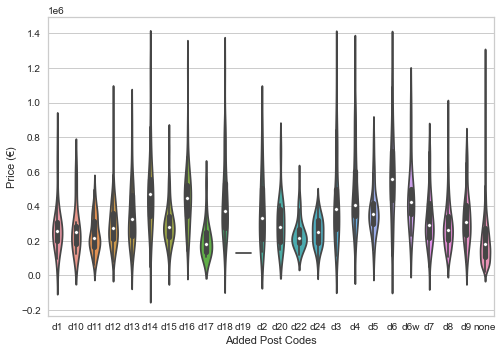

In [44]:
sns.violinplot(x="Added Post Codes", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

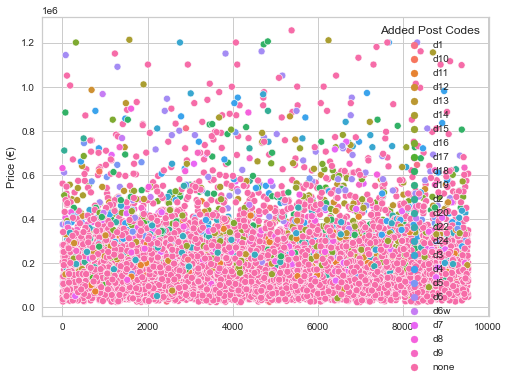

In [45]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Added Post Codes')


In [46]:
CorrelationDataFrame = train.drop('Address', 1)


CorrelationDataFrame['Month'] = train['Month'].astype('int')
CorrelationDataFrame['Year'] = train['Year'].astype('int')





CorrelationDataFrame.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                      int32
Year                                       int32
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

### For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.

- There is a very weak correlation between Year and Price. 

In [47]:
CorrelationDataFrame.corr()

,Price (€),Month,Year
Price (€),1.000000,-0.008989,0.171471
Month,-0.008989,1.000000,-0.023942
Year,0.171471,-0.023942,1.000000


### Interpretation of Plots and Graphs from above:

#### Price and County

- The violin plot shows good variance among counties indicating it is indicative of house price.  

#### Price and Description of Property 

- New and Second hand show differences, showing they could be indicative of house price. 



#### Price and Property Size Description

- This feature also shows good variation between the different specifications, showing it could be predictive of house prices. 




#### Price and Month 

- As with seasons there is no significant differences in house prices as they change month to month. This shows it is most likely not beneficial in predicting house prices. 


#### Price and Year


- There is good variation between years. There is a trend where the year increases so does the house price. This shows good potential for predicting house prices. However, there is certainly no causation with this feature.  

#### Total Number of Loan Approved

- As total number of loans increase the tends to be a greater spread of data. This could also be a useful feature. 

#### GDP

- As GDP increase there tends to be an increase in the mean and median house prices. This shows good potential for being indicative of house prices. 


#### Price and Province 

- There is good variation for the four provinces. For example, leinster has a much greater spread of data with higher prices. While Connaugth sales has much more prices around the mean and less of a spread. 



#### Price and Season

- There does not seem to be any significant interaction with these features. There does not appear to be any variance across the seasons. Therefore it will not included in the training data. 


- The training features will be County,Description of Property,Year, Province, and Added Post Codes. 


## (2). Predictive Modeling and Evaluation: Linear Regression.

#### (2.1) On the training set, train a linear regression model to predict the target feature, using only the descriptive features selected in exercise (1) above.

In [48]:
# training features 
train_feature = ["County","Description of Property","Year", "Province", "GDP (USD-Billion)", "Total Number of Loans Approved", "Added Post Codes"]

# target features 
target_feature1 = ['Price (€)']

train = df[train_feature]
target = df[target_feature1]


train.dtypes



County                            category
Description of Property           category
Year                              category
Province                          category
GDP (USD-Billion)                 category
Total Number of Loans Approved    category
Added Post Codes                  category
dtype: object

In [49]:
target.dtypes

Price (€)    float64
dtype: object

In [50]:
train = pd.get_dummies(data=train, drop_first=True)
train.head()

,County_Cavan,County_Clare,County_Cork,County_Donegal,County_Dublin,County_Galway,County_Kerry,County_Kildare,County_Kilkenny,County_Laois,...,Added Post Codes_d24,Added Post Codes_d3,Added Post Codes_d4,Added Post Codes_d5,Added Post Codes_d6,Added Post Codes_d6w,Added Post Codes_d7,Added Post Codes_d8,Added Post Codes_d9,Added Post Codes_none
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
train.dtypes

County_Cavan             uint8
County_Clare             uint8
County_Cork              uint8
County_Donegal           uint8
County_Dublin            uint8
                         ...  
Added Post Codes_d6w     uint8
Added Post Codes_d7      uint8
Added Post Codes_d8      uint8
Added Post Codes_d9      uint8
Added Post Codes_none    uint8
Length: 83, dtype: object

In [52]:
train.isnull().values.any()


False

In [53]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(train,target,test_size=0.3, random_state=1)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(6547, 83)
(2806, 83)
(6547, 1)
(2806, 1)


### Trainnig the Linear Regression Model 

In [54]:
LR = LinearRegression().fit(Xtrain,Ytrain)
LR

LinearRegression()

In [55]:
print("Features: \n", Xtrain)
print("Coeficients: \n", LR.coef_)
print("\nIntercept: \n", LR.intercept_)

Features: 
       County_Cavan  County_Clare  County_Cork  County_Donegal  County_Dublin  \
551              0             0            0               0              0   
4758             0             0            0               0              1   
4358             0             0            0               0              0   
1643             0             0            0               0              1   
3511             0             0            0               0              0   
...            ...           ...          ...             ...            ...   
2972             0             0            0               0              1   
7975             0             0            0               0              1   
925              0             0            0               0              1   
5312             0             0            0               0              1   
237              0             0            0               0              0   

      County_Galway  County

In [56]:
print(train_feature)

['County', 'Description of Property', 'Year', 'Province', 'GDP (USD-Billion)', 'Total Number of Loans Approved', 'Added Post Codes']


In [57]:
LR_train_predictions = LR.predict(Xtrain)
LR_train_predictions

array([[210880.],
       [342144.],
       [115968.],
       ...,
       [386432.],
       [470656.],
       [195328.]])

<AxesSubplot:xlabel='Price (€)'>

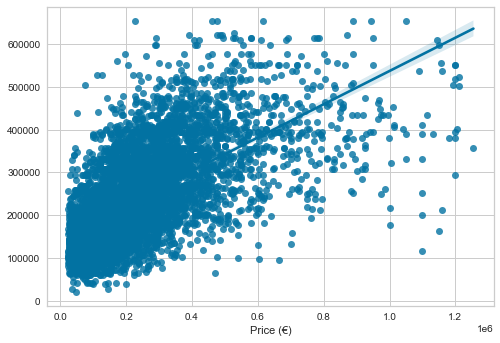

In [58]:
LR_train_predictions = LR.predict(Xtrain)
sns.regplot(Ytrain,LR_train_predictions)


In [59]:
X_train_Sm= sm.add_constant(Xtrain)
X_train_Sm= sm.add_constant(Xtrain)
ls=sm.OLS(Ytrain,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              Price (€)   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     67.28
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:14:40   Log-Likelihood:                -86669.
No. Observations:                6547   AIC:                         1.735e+05
Df Residuals:                    6485   BIC:                         1.739e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

#### (2.2) Interpetation of the linear regression model

- The results from this model thus far are poor. There are number of explanations for this performance. Mainly it is due to the data. The lack of uniformity and the outliers could be the cause of the low R squared value. Linear regression is well-known to be very sensitive to outliers and noise in the data. I think increasing the complexity of this model to try and capture more of the variance would be beneficial. 


- reference: https://www.jstor.org/stable/4531860

#### (2.3) Print the predicted target feature value for the first 10 training examples.

In [60]:
LR_training_data_predictions =LR.predict(Xtrain)


ActualVPredicted = pd.concat([Ytrain, pd.DataFrame(LR_training_data_predictions, columns=['Predicted'], index=Xtrain.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)  Predicted
551    260000.0   210880.0
4758   285000.0   342144.0
4358   101000.0   115968.0
1643   200000.0   260224.0
3511   167000.0   118144.0
4552   115000.0   441600.0
6224   269000.0   288896.0
3159   250850.0   346688.0
5699   212000.0   280064.0
9246    31500.0    91520.0


#### Function for computing evaluation metrics

In [61]:
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))
    print('\n====================')

    
    


#### Regression Evaluation Measures Linear Regression

In [62]:
printMetrics(Ytrain, LR_training_data_predictions)



MAE:  93138.15672674506
MSE:  18448834167.456635
RMSE:  135826.4855153686
R2:  0.38751672174251284



#### (2.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set

#### Training Data Linear regression

- While some of the predictions to look quite close to the actual price. There are a good few values that are a significant amount off the correct price. 

In [63]:
LR_training_data_predictions =LR.predict(Xtrain)


Train_ActualVPredicted = pd.concat([Ytrain, pd.DataFrame(LR_training_data_predictions, columns=['Predicted'], index=Xtrain.index)], axis=1)
print(Train_ActualVPredicted.head(10))

      Price (€)  Predicted
551    260000.0   210880.0
4758   285000.0   342144.0
4358   101000.0   115968.0
1643   200000.0   260224.0
3511   167000.0   118144.0
4552   115000.0   441600.0
6224   269000.0   288896.0
3159   250850.0   346688.0
5699   212000.0   280064.0
9246    31500.0    91520.0


#### Test Data Linear regression

In [64]:
LRtest_data_predictions =LR.predict(Xtest)


Test_ActualVPredicted = pd.concat([Ytest, pd.DataFrame(LRtest_data_predictions, columns=['Predicted'], index=Xtest.index)], axis=1)
print(Test_ActualVPredicted.head(10))

      Price (€)  Predicted
841    75000.00   133760.0
7603  215859.00   395328.0
82    260000.00   267264.0
3168  195000.00   131072.0
4699  170000.00   182720.0
5821  121000.00   129920.0
8798  206452.59   267648.0
6903  315000.00   353472.0
2092  171285.00    74304.0
2639  281000.00   333440.0


#### Looking at evaluations metrics for Test data and Train data linear regression

- The training and test data provide very similar metrics results. This shows good consistency with the model. 

In [65]:
print("________ Test Data ________")
printMetrics(Ytest, LRtest_data_predictions)
print("\n________ Train Data ________")
printMetrics(Ytrain, LR_training_data_predictions)

________ Test Data ________


MAE:  91722.00897006415
MSE:  17831274986.908215
RMSE:  133533.79717100915
R2:  0.3785092706488713


________ Train Data ________


MAE:  93138.15672674506
MSE:  18448834167.456635
RMSE:  135826.4855153686
R2:  0.38751672174251284



#### Comparing results with cross validated model 

- The whole data is used for the cross validation. 
- Classic k-fold cross validation is performed. 

#### Mean Squared Error

In [66]:
X = df[train_feature]
X = pd.get_dummies(X)

cv = KFold(n_splits=5, random_state=1, shuffle=True)


#use k-fold CV to evaluate model
scoresMSE = cross_val_score(LR, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
resultMSE_LR = mean(absolute(scoresMSE))

resultMSE_LR




10488135310765.96

#### Root Mean Squared Error

In [67]:


scoresRMSE = cross_val_score(LR, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
resultRMSE_LR = sqrt(mean(absolute(scoresRMSE)))

resultRMSE_LR


1014154409450666.9

#### R Squared Error

In [68]:

cv = KFold(n_splits=3, random_state=1, shuffle=True)

scoresR2 = cross_val_score(LR, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)
print(scoresR2)
resultR2_LR = mean(absolute(scoresR2))

resultR2_LR = round(resultR2_LR, 3)


resultR2_LR

[ 3.80586243e-01  3.89913969e-01 -1.28987278e+17]


4.2995759449319016e+16

#### Putting Results into Data frame 

In [69]:
linRegResults = {"MSE": resultMSE_LR,
  "RMSE": resultRMSE_LR, "R2": resultR2_LR}

LinRegDF = pd.DataFrame.from_dict(linRegResults, orient='index', columns=['Linear_Regression'])

LinRegDF

,Linear_Regression
MSE,1.048814e+13
RMSE,1.014154e+15
R2,4.299576e+16


- The results for the cross validation shows poor results for the model. The MSE and RMSE are very high indicating a very imperfect model. The R squared value is also very far off. 

## (3). **Predictive Modeling and Evaluation:** Decision Tree.  


####  (3.1) On the training set, train a decision tree model to predict the target feature, using the descriptive features selected in exercise (1) above. 

In [70]:
DTR = tree.DecisionTreeRegressor().fit(Xtrain,Ytrain )
DTR

DecisionTreeRegressor()

In [71]:
Train_predictions_DTR = DTR.predict(Xtrain)
Train_predictions_DTR

array([208481.25      , 345821.75      , 121140.        , ...,
       374325.375     , 377500.        , 189227.27272727])

In [72]:
for importance, name in sorted(zip(DTR.feature_importances_, Xtrain.columns),reverse=True):
 print (name, importance)

County_Dublin 0.47265623123480643
Total Number of Loans Approved_Unkown 0.07367028869701737
Added Post Codes_d6 0.04325601318135428
County_Wicklow 0.03252476892019481
Description of Property_Second-Hand Dwelling house /Apartment 0.031294073854608834
County_Kildare 0.029703435471523383
County_Cork 0.0264536013994735
County_Meath 0.01837786803990199
Added Post Codes_d4 0.016887240510993082
Added Post Codes_d18 0.016441611728686807
Added Post Codes_d14 0.01578663295586575
Added Post Codes_none 0.014391678727818184
Added Post Codes_d16 0.013557299940277935
Year_2021.0 0.012728999845803637
Total Number of Loans Approved_17769.0 0.01011927169815228
Added Post Codes_d3 0.009329112956891232
County_Galway 0.008700801016671512
Year_2016.0 0.007738520466539435
Total Number of Loans Approved_20021.0 0.007113917464381896
Year_2017.0 0.006561377670786692
Province_Munster 0.006103006457632352
GDP (USD-Billion)_334.6 0.004743858856142749
Added Post Codes_d11 0.0046136312094309856
GDP (USD-Billion)_440

### Text representation of the decision tree: 

In [73]:
text_representation = tree.export_text(DTR)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_59 <= 0.50
|   |   |--- feature_24 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |--- feature_55 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_39 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_44 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_44 >  0.50
|   |   |   |   |   |   |   |   |   | 

#### Putting Max Depth as 3 in order to view the decision tree graph 

- The reason I gave a max depth is to make the decisions made at the nodes visible. If I did not limit it, the tree would not be interpretable. 

In [74]:

DTR_example = tree.DecisionTreeRegressor(max_depth=3).fit(Xtrain,Ytrain )




- The colour of the node corresponds to the predicted value:

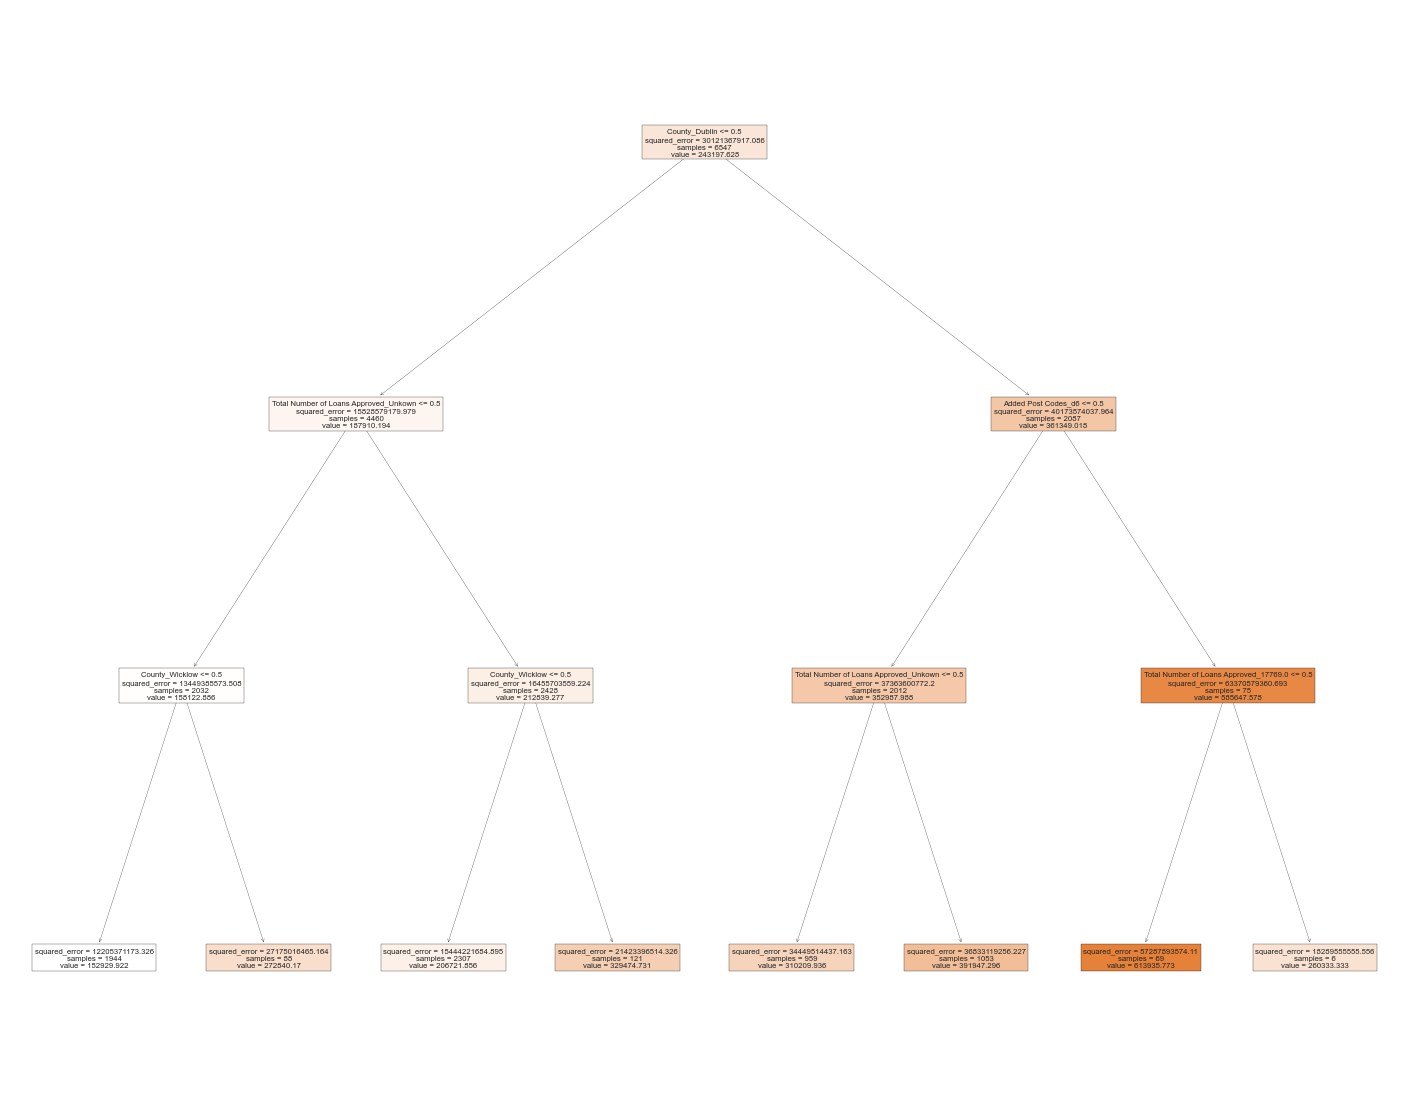

In [75]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTR_example, feature_names=Xtrain.columns, filled=True)

plt.savefig('DecisionTreeGraph.png')


#### (3.2) Can you interpret the decision tree model? Discuss any knowledge you can gain in regard of the working of this model. 

- This model appears to be stronger than the multiple linear regression model. This is possibly due to the Decision tree better supporting non linearality in the data. Furthermore, decision tree better supports categorical independent variables. All the independent variables in this data set are categorical. From looking at the R squared value a greater proportion of the variance is due to the predictive features. I think higher proportion would certainly be desirable. The MSE, MAE, and RMSE are quite high also. 

- reference: https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222#:~:text=LR%20vs%20Decision%20Tree%20%3A,be%20having%20better%20average%20accuracy.


#### (3.3) Print the predicted target feature value for the first 10 training examples. Print a few regression evaluation measures computed on the full training set and discuss your findings so far.

- A lot of these predictions are relatively close to their actual prices. Some adjusting to model could be of great benefit. 

In [76]:
ActualVPredicted_DTR = pd.concat([Ytrain, pd.DataFrame(Train_predictions_DTR, columns=['Predicted'],index=Xtrain.index)], axis=1)
print(ActualVPredicted_DTR.head(10))

      Price (€)      Predicted
551    260000.0  208481.250000
4758   285000.0  345821.750000
4358   101000.0  121140.000000
1643   200000.0  275900.000000
3511   167000.0  106000.000000
4552   115000.0  339571.428571
6224   269000.0  285984.848485
3159   250850.0  233823.720000
5699   212000.0  258714.285714
9246    31500.0  116142.857143


- As you can see the metrics are slightly improved compared to the linear regression. 

In [77]:
print("\n________ Train Data ________")
printMetrics(Ytrain, Train_predictions_DTR)


________ Train Data ________


MAE:  85869.54384184399
MSE:  16300991371.483452
RMSE:  127675.33579937612
R2:  0.4588230051053894



#### (3.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70% examples) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or k repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and discuss your findings.

In [78]:
Train_predictions_DTR = DTR.predict(Xtrain)
Train_predictions_DTR

array([208481.25      , 345821.75      , 121140.        , ...,
       374325.375     , 377500.        , 189227.27272727])

In [79]:
Test_predictions_DTR = DTR.predict(Xtest)

- The training data has slightly better metrics compared to the test data. This is probably due to simply having more data. 

In [80]:
print("________ Test Data ________")
printMetrics(Ytest, Test_predictions_DTR)
print("\n________ Train Data ________")
printMetrics(Ytrain, Train_predictions_DTR)


________ Test Data ________


MAE:  96528.88573249862
MSE:  19654357562.842957
RMSE:  140193.9997390864
R2:  0.3149676046369405


________ Train Data ________


MAE:  85869.54384184399
MSE:  16300991371.483452
RMSE:  127675.33579937612
R2:  0.4588230051053894



#### Cross Validation Decision Tree 

- Here cross validation is implemented on the Decision tree model. 

#### Mean Squared Error 

In [81]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#use k-fold CV to evaluate model
DTscoresMSE = cross_val_score(DTR, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
resultMSE_DT = mean(absolute(DTscoresMSE))

resultMSE_DT = (round(resultMSE_DT, 3))


resultMSE_DT



97679.126

#### Root Mean Squared Error

In [82]:
DTscoresRMSE = cross_val_score(DTR, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
resultRMSE_DT = sqrt(mean(absolute(DTscoresRMSE)))
resultRMSE_DT = (round(resultRMSE_DT, 2))

resultRMSE_DT

142282.34

#### R Squared 

In [83]:
DTscoresR2 = cross_val_score(DTR, X, y, scoring=make_scorer(r2_score),
                         cv=cv, n_jobs=-1)
resultR2_DT = mean(absolute(DTscoresR2))
resultR2_DT = (round(resultR2_DT, 4))

resultR2_DT

0.3193

### Putting Results into a data frame 

In [84]:
DTResults = {"MSE": resultMSE_DT,
  "RMSE": resultRMSE_DT, "R2": resultR2_DT}

DT_DF = pd.DataFrame.from_dict(DTResults, orient='index', columns=['Decision Tree'])

DT_DF

,Decision Tree
MSE,97679.1260
RMSE,142282.3400
R2,0.3193


- The results from the cross validation show only a slightly worse performance which is a far better result compared to the linear regression. 

## (4).  **Predictive Modeling and Evaluation:** Random Forest.  


#### (4.1) On the training set, train a random forest model to predict the target feature, using the descriptive features selected in exercise (1) above.   

In [85]:
random_forest = RandomForestRegressor(random_state=1)
random_forest = random_forest.fit(Xtrain,Ytrain)

In [86]:
train_prediction_RF =  random_forest.predict(Xtrain)
train_prediction_RF

array([206886.48499338, 346017.30996986, 128344.54047619, ...,
       360264.82057196, 374249.52423492, 190446.79368426])

In [87]:
printMetrics(Ytrain, train_prediction_RF)



MAE:  86726.44065831075
MSE:  16390177381.730745
RMSE:  128024.12812329848
R2:  0.4558621166592606



#### (4.2) Can you interpret the random forest model? Discuss any knowledge you can gain in regard of the working of this model.

#### I have placed a max depth at 3 in order for the tree to be visible

[Text(0.5, 0.875, 'County_Dublin <= 0.5\nsquared_error = 29856764092.486\nsamples = 4136\nvalue = 243653.878'),
 Text(0.25, 0.625, 'County_Wicklow <= 0.5\nsquared_error = 15930331602.669\nsamples = 2844\nvalue = 190856.277'),
 Text(0.125, 0.375, 'Total Number of Loans Approved_Unkown <= 0.5\nsquared_error = 14628092682.963\nsamples = 2707\nvalue = 184332.311'),
 Text(0.0625, 0.125, 'squared_error = 12443790157.86\nsamples = 1229\nvalue = 155926.598'),
 Text(0.1875, 0.125, 'squared_error = 15215366201.541\nsamples = 1478\nvalue = 207824.211'),
 Text(0.375, 0.375, 'Total Number of Loans Approved_Unkown <= 0.5\nsquared_error = 24382247916.187\nsamples = 137\nvalue = 316868.729'),
 Text(0.3125, 0.125, 'squared_error = 16683500173.512\nsamples = 58\nvalue = 266404.95'),
 Text(0.4375, 0.125, 'squared_error = 26908488563.804\nsamples = 79\nvalue = 358991.387'),
 Text(0.75, 0.625, 'Added Post Codes_d6 <= 0.5\nsquared_error = 40853938838.213\nsamples = 1292\nvalue = 360549.893'),
 Text(0.625, 0

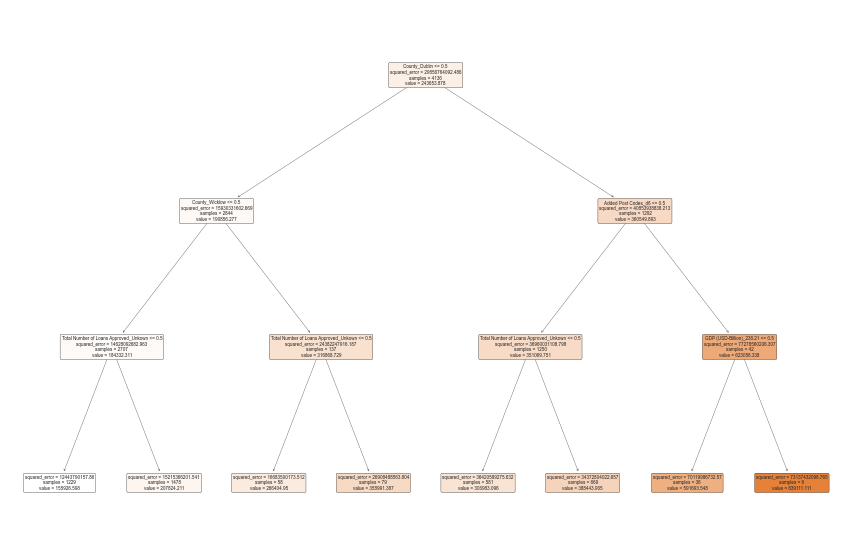

In [88]:
random_forest_depth = RandomForestRegressor(max_depth=3, random_state=1)
random_forest_depth = random_forest_depth.fit(Xtrain,Ytrain)


fig2 = plt.figure(figsize=(15, 10))
fig2.savefig('RandomForestTreeGraph.png')

plot_tree(random_forest_depth.estimators_[0], 
                  feature_names= Xtrain.columns,
          class_names=Ytrain.columns, 
          filled=True, impurity=True, 
          rounded=True)

- The root node is County Dublin. This is also consistent with the feature importance. This means it is the most important feature in predicting the target feature of price. 
- The sample 6547 indicates that there are that many observations in that node. 

#### Looking at the importance of each feature

- We can see that County Dublin is the most important feature with the year 2022 being one of the least important features. 

In [89]:
for importance, name in sorted(zip(random_forest.feature_importances_, Xtrain.columns),reverse=True):
 print (name, importance)



County_Dublin 0.4320783725505161
Total Number of Loans Approved_Unkown 0.0667836008051569
Added Post Codes_d6 0.04109380926201054
Description of Property_Second-Hand Dwelling house /Apartment 0.03714726586752437
County_Wicklow 0.03037099525210481
County_Cork 0.0252667714843029
County_Kildare 0.024239963764431927
Added Post Codes_d4 0.01843547533683503
County_Meath 0.016109252219994638
Added Post Codes_d14 0.016052358011585065
Added Post Codes_d18 0.014272351496737206
Added Post Codes_none 0.013452530492623084
Added Post Codes_d16 0.012140260014766745
Year_2021.0 0.011355267130483012
Added Post Codes_d3 0.009636498685273389
GDP (USD-Billion)_440.0 0.008841981517505282
County_Galway 0.00860427072652323
Total Number of Loans Approved_20021.0 0.008303997043059072
GDP (USD-Billion)_334.6 0.007381186869012632
Province_Leinster 0.00707189484862464
Year_2017.0 0.006654970585109914
Added Post Codes_d11 0.006361686241465993
Added Post Codes_d15 0.005591105596546087
Year_2018.0 0.0055769764361477

 #### (4.3) Print the predicted target feature value for the first 10 training examples. Print a few regression evaluation measures computed on the full training set and discuss your findings so far.

In [90]:
train_prediction_RF =  random_forest.predict(Xtrain)


ActualVPredicted = pd.concat([Ytrain, pd.DataFrame(train_prediction_RF, columns=['Predicted'], index=Xtrain.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)      Predicted
551    260000.0  206886.484993
4758   285000.0  346017.309970
4358   101000.0  128344.540476
1643   200000.0  276293.611874
3511   167000.0  106764.275035
4552   115000.0  338651.204573
6224   269000.0  291142.587752
3159   250850.0  234849.926178
5699   212000.0  261704.621490
9246    31500.0  116626.072691


In [91]:
printMetrics(Ytrain, train_prediction_RF)



MAE:  86726.44065831075
MSE:  16390177381.730745
RMSE:  128024.12812329848
R2:  0.4558621166592606



#### (4.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70% examples) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or k repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and to the random forest out-of-sample error and discuss your findings.

- Test and training data are relatively similar in their metrics. 

In [92]:
test_prediction_RF =  random_forest.predict(Xtest)


print("________ Test Data ________")
printMetrics(Ytest, test_prediction_RF)
print("\n________ Train Data ________")
printMetrics(Ytrain, train_prediction_RF)


________ Test Data ________


MAE:  95059.4191087667
MSE:  19105130173.842987
RMSE:  138221.3086822831
R2:  0.3341103597579187


________ Train Data ________


MAE:  86726.44065831075
MSE:  16390177381.730745
RMSE:  128024.12812329848
R2:  0.4558621166592606



#### First ten comparing test set for predicted price and actual price random forest. 

In [93]:
ActualVPredicted = pd.concat([Ytest, pd.DataFrame(test_prediction_RF, columns=['Predicted'], index=Xtest.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)      Predicted
841    75000.00  121533.224394
7603  215859.00  392450.316700
82    260000.00  220020.009158
3168  195000.00  117854.781172
4699  170000.00  205064.079884
5821  121000.00  132444.490139
8798  206452.59  265135.683406
6903  315000.00  341541.976246
2092  171285.00  127338.848096
2639  281000.00  288487.965840


#### Cross Validation with Random Forest

- K-Fold Cross Validation is utilised again here. 


#### Mean Squared Error 

In [94]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)


#use k-fold CV to evaluate model
RFscoresMSE = cross_val_score(random_forest, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
resultMSE_RF = mean(absolute(RFscoresMSE))

resultMSE_RF = (round(resultMSE_RF, 3))

resultMSE_RF






96628.988

#### Root Mean Squared Error

In [95]:


RFscoresRMSE = cross_val_score(random_forest, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
resultRMSE_RF = sqrt(mean(absolute(RFscoresRMSE)))

resultRMSE_RF = (round(resultRMSE_RF, 2))


resultRMSE_RF

140639.53

#### R Squared Error

In [96]:


RFscoresR2 = cross_val_score(random_forest, X, y, scoring=make_scorer(r2_score),
                         cv=cv, n_jobs=-1)
resultR2_RF = mean(absolute(RFscoresR2))

resultR2_RF = (round(resultR2_RF, 3))


resultR2_RF

0.334

#### Putting Results into Data frame 

In [97]:
RF_Results = {"MSE": resultMSE_RF,
  "RMSE": resultRMSE_RF, "R2": resultR2_RF}

RF_DF = pd.DataFrame.from_dict(RF_Results, orient='index', columns=['Random Forest'])

RF_DF

,Random Forest
MSE,96628.988
RMSE,140639.530
R2,0.334


#### Assessing how the training score and the cross validation line up. 

- From the graph it appears as though the model would benefit from being trained on more data. 

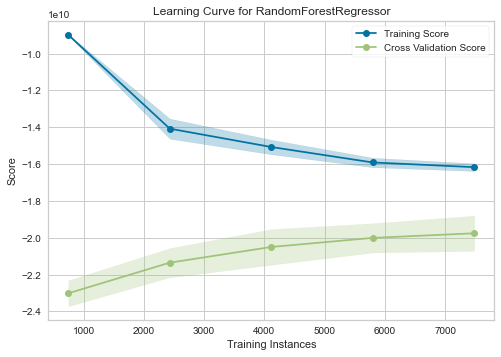

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [98]:

# print(learning_curve(random_forest, X, y, cv=5, scoring='neg_mean_squared_error'))



## (5).  **Improving Predictive Models.**


#### (5.1) Which model of the ones trained above performs better at predicting the target feature? Is it more accurate than a simple model that always predicts the average price computed from the training set, for the same year as the test example? Justify your answers.

- Showing results of All three modes:

In [99]:
AllResults = pd.concat([LinRegDF, DT_DF, RF_DF], axis=1)



AllResults

print("\n Cross Validation Results of all Models")

AllResults


 Cross Validation Results of all Models


,Linear_Regression,Decision Tree,Random Forest
MSE,1.048814e+13,97679.1260,96628.988
RMSE,1.014154e+15,142282.3400,140639.530
R2,4.299576e+16,0.3193,0.334


- It appears from the results above that the Random Forest model is my most accurate model. 

#### Creating a model that only uses average price 

In [100]:
df_Price_Per_year = training[['Year', 'Price (€)']].copy()

df_Price_Per_year.head()

,Year,Price (€)
551,2021.0,260000.0
4758,2015.0,285000.0
4358,2016.0,101000.0
1643,2019.0,200000.0
3511,2013.0,167000.0


In [101]:
# mean_price_per_year['Mean Price Per Year'] = df_Price_Per_year.groupby(['Year']).mean()


mean_price_per_year = df_Price_Per_year.groupby(['Year']).mean()

mean_price_per_year_ = mean_price_per_year.rename({'Price (€)': 'Mean Price Per Year'}, axis=1)  # new method

mean_price_per_year_
# df_Price_Per_year['average price per year'] = mean_price_per_year
# df_Price_Per_year

,Mean Price Per Year
Year,
2010.0,228641.219111
2011.0,216722.897422
2012.0,187979.134032
2013.0,196924.061472
2014.0,200675.503163
2015.0,211880.248366
2016.0,232446.134926
2017.0,255032.529230
2018.0,257477.849328


#### Dataframe with Year, actual Price and Mean Price per year based on training data

In [102]:
df_year_price_meanPricePerYear = pd.merge(df_Price_Per_year, mean_price_per_year, on="Year")
df_year_price_meanPricePerYear.head()

,Year,Price (€)_x,Price (€)_y
0,2021.0,260000.00,299148.268615
1,2021.0,135000.00,299148.268615
2,2021.0,207048.46,299148.268615
3,2021.0,165000.00,299148.268615
4,2021.0,225000.00,299148.268615


In [103]:
df_year_price_meanPricePerYear.describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€)_x,6547.0,243197.62755,173568.342186,22000.000000,125000.000000,205000.00000,310000.000000,1.255000e+06
Price (€)_y,6547.0,243197.62755,33297.708724,187979.134032,211880.248366,255032.52923,268272.794601,2.991483e+05


In [104]:
df_year_price_meanPricePerYear = df_year_price_meanPricePerYear.drop('Price (€)_x', 1)
df_year_price_meanPricePerYear = df_year_price_meanPricePerYear.drop('Year', 1)
df_year_price_meanPricePerYear



,Price (€)_y
0,299148.268615
1,299148.268615
2,299148.268615
3,299148.268615
4,299148.268615
...,...
6542,223294.800000
6543,223294.800000
6544,223294.800000
6545,223294.800000


### Printing evaluation metrics for new model:

In [105]:

print("\n Simple model which just takes average as prediction")
printMetrics(Ytrain, df_year_price_meanPricePerYear)


print("\n Other Models:")
print("\n", AllResults)


 Simple model which just takes average as prediction


MAE:  128482.59031806169
MSE:  31322564111.07282
RMSE:  176981.8185890088
R2:  -0.03987854061918683


 Other Models:

       Linear_Regression  Decision Tree  Random Forest
MSE        1.048814e+13     97679.1260      96628.988
RMSE       1.014154e+15    142282.3400     140639.530
R2         4.299576e+16         0.3193          0.334


### Interpretation

- As you can see just using the simple model performs a lot worse. This shows that the added features provide beneficial data in predicting house prices. 

#### (5.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining models, or using other knowledge)? Please show how your ideas actually work in practice, by training and evaluating your proposed models. Summarise your findings so far.

- It seems as though will my models are better at predicting the price of a house in Ireland then simply using the average, there are still quite weak. As it stands I would not Mechanism to improve the model would be hugely beneficial. 

- I will attempt to improve the random forest model by tuning the parameter

#### List of current parameter currently in use

In [109]:
print('\n Current Parameter:')
pprint(random_forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [123]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [124]:
rf_improved = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf_improved, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtrain,Ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [125]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [137]:
best_random = rf_random.best_estimator_


best_random_train_predictions = best_random.predict(Xtrain)


print("\n Adjusted Parameter Model:")
printMetrics(Ytrain, best_random_train_predictions)

print("\n Orginal Model")
print(RF_DF)



 Adjusted Parameter Model:


MAE:  89245.81839451371
MSE:  17106264977.791178
RMSE:  130790.92085382371
R2:  0.43208870776124564


 Orginal Model
      Random Forest
MSE       96628.988
RMSE     140639.530
R2            0.334


- As you can see there is a slight improvement in performance from using the adjusted parameters. 

#### Reference: 

- The code to tune the parameters was adjusted from the following artical: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#### (5.3) Take your best model trained and selected based on past data (i.e. your cleaned Homework1 dataset), and evaluate it on the new test dataset provided with this homework (in file '22032022-PPR-Price-recent.csv'). Note that the new test data has to be transformed using the same steps as the past training data, otherwise the trained model cannot be used for prediction on the new data. Discuss your findings

In [172]:
df_newDataSet = pd.read_csv('22032022-PPR-Price-recent.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df_newDataSet .head(5)

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
0,2022-01-15,"24 FOREST WALK, SWORDS, DUBLIN",NaN,Dublin,154000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2022-01-15,"5 CRAGAUN, FATHER RUSSELL ROAD, DOORADOYLE",NaN,Limerick,370000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
2,2022-01-16,"19 The Lawn, Mullen Park, Maynooth",NaN,Kildare,409691.63,No,Yes,New Dwelling house /Apartment,NaN
3,2022-01-16,"MONTEVIDEO, HOSPITAL HILL, BUNCLODY",NaN,Wexford,100000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
4,2022-01-17,"1 CILL BEG MANOR, STRADBALLY, LAOIS",NaN,Laois,225000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


In [173]:
df_newDataSet.dtypes

DateofSale(dd/mm/yyyy)      object
Address                     object
PostalCode                  object
County                      object
Price(€)                   float64
NotFullMarketPrice          object
VATExclusive                object
DescriptionofProperty       object
PropertySizeDescription    float64
dtype: object

In [174]:
df_newDataSet = df_newDataSet.fillna('none')


### Adding in extra features to new set of data 

In [175]:
df_newDataSet['Month'] = pd.DatetimeIndex(df_newDataSet['DateofSale(dd/mm/yyyy)']).month
df_newDataSet['Year'] = pd.DatetimeIndex(df_newDataSet['DateofSale(dd/mm/yyyy)']).year




In [176]:
df_newDataSet['GDP (USD-Billion)'] = df.apply(
    lambda row: row.Year, axis=1)

df_newDataSet.loc[df_newDataSet.Year== 2010, 'GDP (USD-Billion)'] = 221.66
df_newDataSet.loc[df_newDataSet.Year== 2011, 'GDP (USD-Billion)'] = 238.66
df_newDataSet.loc[df_newDataSet.Year== 2012, 'GDP (USD-Billion)'] = 225.51
df_newDataSet.loc[df_newDataSet.Year== 2013, 'GDP (USD-Billion)'] = 238.21
df_newDataSet.loc[df_newDataSet.Year== 2014, 'GDP (USD-Billion)'] = 258.63
df_newDataSet.loc[df_newDataSet.Year== 2015, 'GDP (USD-Billion)'] = 291.46
df_newDataSet.loc[df_newDataSet.Year== 2016, 'GDP (USD-Billion)'] = 298.73
df_newDataSet.loc[df_newDataSet.Year== 2017, 'GDP (USD-Billion)'] = 334.60
df_newDataSet.loc[df_newDataSet.Year== 2018, 'GDP (USD-Billion)'] = 384.85
df_newDataSet.loc[df_newDataSet.Year== 2019, 'GDP (USD-Billion)'] = 399.12
df_newDataSet.loc[df_newDataSet.Year== 2020, 'GDP (USD-Billion)'] = 425.89
df_newDataSet.loc[df_newDataSet.Year== 2021, 'GDP (USD-Billion)'] = 440
df_newDataSet.loc[df_newDataSet.Year== 2022, 'GDP (USD-Billion)'] = 'Unknown'





In [177]:
df_newDataSet['Province'] = df_newDataSet.apply(
    lambda row: row.County, axis=1)

df_newDataSet.loc[df_newDataSet.County== 'Dublin', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Carlow', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Kildare', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Kilkenny', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Laois', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Longford', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Louth', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Meath', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Offaly', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Westmeath', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Wexford', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Wicklow', 'Province'] = 'Leinster'
df_newDataSet.loc[df_newDataSet.County== 'Cork', 'Province'] = 'Munster'
df_newDataSet.loc[df_newDataSet.County== 'Clare', 'Province'] = 'Munster'
df_newDataSet.loc[df_newDataSet.County== 'Kerry', 'Province'] = 'Munster'
df_newDataSet.loc[df_newDataSet.County== 'Limerick', 'Province'] = 'Munster'
df_newDataSet.loc[df_newDataSet.County== 'Tipperary', 'Province'] = 'Munster'
df_newDataSet.loc[df_newDataSet.County== 'Waterford', 'Province'] = 'Munster'
df_newDataSet.loc[df_newDataSet.County== 'Galway', 'Province'] = 'Connaught'
df_newDataSet.loc[df_newDataSet.County== 'Leitrim', 'Province'] = 'Connaught'
df_newDataSet.loc[df_newDataSet.County== 'Mayo', 'Province'] = 'Connaught'
df_newDataSet.loc[df_newDataSet.County== 'Roscommon', 'Province'] = 'Connaught'
df_newDataSet.loc[df_newDataSet.County== 'Sligo', 'Province'] = 'Connaught'
df_newDataSet.loc[df_newDataSet.County== 'Donegal', 'Province'] = 'Ulster'
df_newDataSet.loc[df_newDataSet.County== 'Cavan', 'Province'] = 'Ulster'
df_newDataSet.loc[df_newDataSet.County== 'Monaghan', 'Province'] = 'Ulster'




In [178]:
df_newDataSet['Season'] = df.apply(
    lambda row: row.Month, axis=1)

df_newDataSet.loc[df_newDataSet.Month== 12, 'Season'] = 'Winter'
df_newDataSet.loc[df_newDataSet.Month== 1, 'Season'] = 'Winter'
df_newDataSet.loc[df_newDataSet.Month== 2, 'Season'] = 'Winter'
df_newDataSet.loc[df_newDataSet.Month== 3, 'Season'] = 'Spring'
df_newDataSet.loc[df_newDataSet.Month== 4, 'Season'] = 'Spring'
df_newDataSet.loc[df_newDataSet.Month== 5, 'Season'] = 'Spring'
df_newDataSet.loc[df_newDataSet.Month== 6, 'Season'] = 'Summer'
df_newDataSet.loc[df_newDataSet.Month== 7, 'Season'] = 'Summer'
df_newDataSet.loc[df_newDataSet.Month== 8, 'Season'] = 'Summer'
df_newDataSet.loc[df_newDataSet.Month== 9, 'Season'] = 'Autumn'
df_newDataSet.loc[df_newDataSet.Month== 10, 'Season'] = 'Autumn'
df_newDataSet.loc[df_newDataSet.Month== 11, 'Season'] = 'Autumn'

In [179]:
df_newDataSet['Total Number of Loans Approved'] = df.apply(
    lambda row: row.Year, axis=1)

df_newDataSet.loc[df_newDataSet.Year== 2010, 'Total Number of Loans Approved'] = 20021
df_newDataSet.loc[df_newDataSet.Year== 2011, 'Total Number of Loans Approved'] = 12834
df_newDataSet.loc[df_newDataSet.Year== 2012, 'Total Number of Loans Approved'] = 17769
df_newDataSet.loc[df_newDataSet.Year== 2013, 'Total Number of Loans Approved'] = 19258
df_newDataSet.loc[df_newDataSet.Year== 2014, 'Total Number of Loans Approved'] = 31897
df_newDataSet.loc[df_newDataSet.Year== 2015, 'Total Number of Loans Approved'] = 32236
df_newDataSet.loc[df_newDataSet.Year== 2016, 'Total Number of Loans Approved'] = 35037
df_newDataSet.loc[df_newDataSet.Year== 2017, 'Total Number of Loans Approved'] = 'Unkown'
df_newDataSet.loc[df_newDataSet.Year== 2018, 'Total Number of Loans Approved'] = 'Unkown'
df_newDataSet.loc[df_newDataSet.Year== 2019, 'Total Number of Loans Approved'] = 'Unkown'
df_newDataSet.loc[df_newDataSet.Year== 2020, 'Total Number of Loans Approved'] = 'Unkown'
df_newDataSet.loc[df_newDataSet.Year== 2021, 'Total Number of Loans Approved'] = 'Unkown'
df_newDataSet.loc[df_newDataSet.Year== 2022, 'Total Number of Loans Approved'] = 'Unkown'



df_newDataSet['Total Number of Loans Approved'] = df_newDataSet['Total Number of Loans Approved'].astype('category')

In [180]:
df_newDataSet['County'] = df_newDataSet['County'].astype('category')

# There are a set number of unique descriptions

df_newDataSet['DescriptionofProperty'] = df_newDataSet['DescriptionofProperty'].astype('category')

df_newDataSet['Address'] = df_newDataSet['Address'].astype('category')


# Postal code has a set number of unique categories
df_newDataSet['PostalCode'] = df_newDataSet['PostalCode'].astype('category')

# There are a set number of property size descriptions
df_newDataSet['PropertySizeDescription'] = df_newDataSet['PropertySizeDescription'].astype('category')

# this is just yes or no data there for categorical 
df_newDataSet['VATExclusive'] = df_newDataSet['VATExclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
df_newDataSet['NotFullMarketPrice'] = df_newDataSet['NotFullMarketPrice'].astype('category')

df_newDataSet['DateofSale(dd/mm/yyyy)'] = pd.to_datetime(df_newDataSet['DateofSale(dd/mm/yyyy)'])

df_newDataSet['Month'] = df_newDataSet['Month'].astype('category')

df_newDataSet['Year'] = df_newDataSet['Year'].astype('category')

df_newDataSet['GDP (USD-Billion)'] = df_newDataSet['GDP (USD-Billion)'].astype('category')

df_newDataSet['Province'] = df_newDataSet['Province'].astype('category')

df_newDataSet['Season'] = df_newDataSet['Season'].astype('category')



df_newDataSet.dtypes

DateofSale(dd/mm/yyyy)            datetime64[ns]
Address                                 category
PostalCode                              category
County                                  category
Price(€)                                 float64
NotFullMarketPrice                      category
VATExclusive                            category
DescriptionofProperty                   category
PropertySizeDescription                 category
Month                                   category
Year                                    category
GDP (USD-Billion)                       category
Province                                category
Season                                  category
Total Number of Loans Approved          category
dtype: object

In [186]:
df_newDataSet

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription,Month,Year,GDP (USD-Billion),Province,Season,Total Number of Loans Approved
0,2022-01-15,"24 FOREST WALK, SWORDS, DUBLIN",none,Dublin,154000.00,No,No,Second-Hand Dwelling house /Apartment,none,1,2022,Unknown,Leinster,Winter,Unkown
1,2022-01-15,"5 CRAGAUN, FATHER RUSSELL ROAD, DOORADOYLE",none,Limerick,370000.00,No,No,Second-Hand Dwelling house /Apartment,none,1,2022,Unknown,Munster,Winter,Unkown
2,2022-01-16,"19 The Lawn, Mullen Park, Maynooth",none,Kildare,409691.63,No,Yes,New Dwelling house /Apartment,none,1,2022,Unknown,Leinster,Winter,Unkown
3,2022-01-16,"MONTEVIDEO, HOSPITAL HILL, BUNCLODY",none,Wexford,100000.00,No,No,Second-Hand Dwelling house /Apartment,none,1,2022,Unknown,Leinster,Winter,Unkown
4,2022-01-17,"1 CILL BEG MANOR, STRADBALLY, LAOIS",none,Laois,225000.00,No,No,Second-Hand Dwelling house /Apartment,none,1,2022,Unknown,Leinster,Winter,Unkown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7177,2022-03-11,"LISREAGH, LISREAGH, CAVAN",none,Cavan,175000.00,No,No,Second-Hand Dwelling house /Apartment,none,3,2022,Unknown,Ulster,Spring,Unkown
7178,2022-03-11,"MIDDLE MAIN STREET, CASTLEREA, CO ROSCOMMON",none,Roscommon,122000.00,No,No,Second-Hand Dwelling house /Apartment,none,3,2022,Unknown,Connaught,Spring,Unkown
7179,2022-03-11,"NO 1 THE HYNES BUILDING, PORTUMNA, CO GALWAY",none,Galway,11250.90,Yes,No,Second-Hand Dwelling house /Apartment,none,3,2022,Unknown,Connaught,Spring,Unkown
7180,2022-03-11,"TALLAGH HILL, BELMULLET, MAYO",none,Mayo,169750.00,No,No,Second-Hand Dwelling house /Apartment,none,3,2022,Unknown,Connaught,Spring,Unkown


In [195]:
targetFeature = ["Price(€)"]
y = df_newDataSet[targetFeature]

trainingFeatures = ["County","DescriptionofProperty","Year", "Province", "GDP (USD-Billion)", "Total Number of Loans Approved", "PostalCode"]

X = df_newDataSet[trainingFeatures]
X = pd.get_dummies(X)

# X = X.drop(['Price(€)'], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)

In [196]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [198]:
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [200]:
newDataPredictions = random_forest.predict(X_train)


print("\n Evaluation Metrics for new data set:")
printMetrics(y_train, newDataPredictions)


print("\n Orginal Data Set")
print(RF_DF)




 Evaluation Metrics for new data set:


MAE:  149948.37906271804
MSE:  270950619527.41696
RMSE:  520529.1725997852
R2:  0.2728127575760404


 Orginal Data Set
      Random Forest
MSE       96628.988
RMSE     140639.530
R2            0.334


- As you can see the metrics with using the new data set are slightly worse. I would think the issue with the data is under fitting. Furthermore, I think this task would have benefited from halving more specific features. For example, the GDP feature is probably to generic. A feature that is more specific to an address or group of address rather than being specific to an entire year would have yielded more positive results 

<h2 align="center"> Conclusion</h2>

While this was a very challenging assignment, I have learned a huge amount. I have zero prior knowledge of data analysis and machine learning coming into this model. 

This was a very interesting task as the housing market is a particularly pertinent subject. It was interesting to see how the different models performed and compared. It is important to have a very good understanding of the data set, as this seems to be what dictates what type of model to utilize. I think there would be a few things I would change if I was to the task again. I the issue with my models is they were probably not complex enough. I think I need more features like the size of their garden or how many bedrooms for each house. I had too many features that were solely based off the year, and this proved too weak. More specific areas would also have been beneficial, like an Eircode feature.  

I look forward to bringing this knowledge into future assignments and projects. I am also now eager to learn more about the fascinating world of machine learning. 